# Building Agents That Use Tool-Calling

This notebook is part of the [Hugging Face Agents Course unit 2](https://huggingface.co/agents-course/notebooks/blob/main/unit2/smolagents/code_agents.ipynb), a free Course from beginner to expert, where you learn to build Agents.


## Description
In this notebook, we examine the use of `smolagents` where we emphasize the use of AI Agents that use Tool-Calling.

We show how to make and use tools

## Selecting a Playlist for the Party Using smolagents - Tool`

# Load Imports

In [22]:
import os

from dotenv import load_dotenv
from huggingface_hub import notebook_login
from langchain.agents import load_tools
import matplotlib.pyplot as plt
from PIL import Image as PILImage

from smolagents import CodeAgent, InferenceClientModel, load_tool, Tool, tool

##### Login to the Hugging Face Hub to Have Access to the Serveless Inference API

Note: You will need to add your token when prompted.


`HF_TOKEN_INFERENCE2`

In [18]:
# Load environment variables from .env
load_dotenv()

True

In [19]:
# Get Hugging Face Token
HF_TOKEN_INFERENCE2 = os.environ.get("HF_TOKEN_INFERENCE2")

# Get SerApi API Key
SERPAPI_API_KEY = os.environ.get("SERPAPI_API_KEY")

In [4]:
notebook_login()

#### Example running an AI Agent using `@tool` Decorator

Generating a tool that retrieves the highest-rated catering
Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [6]:
# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=InferenceClientModel())

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 1: Duration 1.21 seconds| Input tokens: 1,995 | Output tokens: 62]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Catering Co.")                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Catering Co.

[Step 2: Duration 0.91 seconds| Input tokens: 4,149 | Output tokens: 125]

Gotham Catering Co.


---
# Defining a Tool as a Python Class

#### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a superhero-themed event, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [8]:
class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=InferenceClientModel())

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  theme_idea = superhero_party_theme_generator(category="villain masquerade")                                      
  print("Suggested theme idea:", theme_idea)                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Suggested theme idea: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 1: Duration 1.01 seconds| Input tokens: 2,030 | Output tokens: 70]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.")      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 2: Duration 1.18 seconds| Input tokens: 4,241 | Output tokens: 156]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


---
# Sharing a Tool to the Hub
Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his catering_service_tool to help others find the best catering services in Gotham. Here's how to do it:

In [9]:
party_theme_tool.push_to_hub("beenlanced/catering_service_tool", token=HF_TOKEN_INFERENCE2)

README.md:   0%|          | 0.00/240 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/beenlanced/catering_service_tool/commit/6803e5b2035da08529032b7a9b5515692585e564', commit_message='Upload tool', commit_description='', oid='6803e5b2035da08529032b7a9b5515692585e564', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/beenlanced/catering_service_tool', endpoint='https://huggingface.co', repo_type='space', repo_id='beenlanced/catering_service_tool'), pr_revision=None, pr_num=None)

# Importing a Tool from the Hub
You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

tool.py:   0%|          | 0.00/635 [00:00<?, ?B/s]

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A high-res, photorealistic image of a luxurious superhero-themed party at Wayne Manor. The party is    
  grand, filled with elegant guests wearing custom-made superhero costumes. The decorations include large banners  
  and balloons featuring iconic superhero symbols. Wayne Manor's iconic Bat symbol hangs prominently, blending     
  seamlessly with superhero motifs. The guests are having a fantastic time, enjoying gourmet food and drinks,      
  while a DJ plays upbeat superhero-themed music. Made-up superheros, such as 'The Caped Crusaderess,' 'Batgirl    
  Prime,' and 'Cyber Nightwing,' mingle with famous heroes like Batman and Wonder Woman. The lighting is           
  glamorous and the atmosphere is electric."                                                                       
  image_generator(prompt)                                                                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x1293B3CE0>

[Step 1: Duration 4.63 seconds| Input tokens: 2,025 | Output tokens: 179]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
                                                                                                                   
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: None

[Step 2: Duration 0.28 seconds| Input tokens: 4,464 | Output tokens: 182]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer(image_generator(prompt))                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x129415790>

[Step 3: Duration 2.35 seconds| Input tokens: 6,961 | Output tokens: 235]

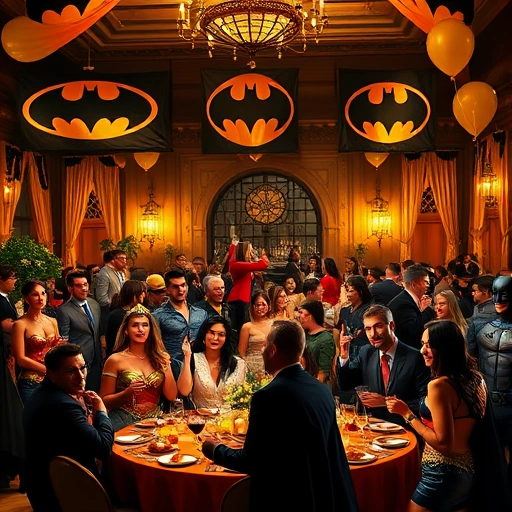

In [11]:
image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=InferenceClientModel()
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

---

---

# Importing a Hugging Face Space as a Tool
You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces `Gradio` backend using the `gradio_client`, so make sure to install it via pip if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!#

In [ ]:
image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

model = InferenceClientModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  improved_prompt = f"A grand superhero-themed party at Wayne Manor, filled with high-society guests and masked    
  heroes. Alfred is overseeing a luxurious gala, ensuring everything runs smoothly. Decorations feature iconic     
  superhero symbols, and the atmosphere is electric with excitement."                                              
  print(improved_prompt)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
A grand superhero-themed party at Wayne Manor, filled with high-society guests and masked heroes. Alfred is 
overseeing a luxurious gala, ensuring everything runs smoothly. Decorations feature iconic superhero symbols, and 
the atmosphere is electric with excitement.

Out: None

[Step 1: Duration 1.71 seconds| Input tokens: 2,023 | Output tokens: 98]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  image = image_generator(prompt=improved_prompt)                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 
/private/var/folders/10/l97qc6mn0md1lz6bm0j3x1fh0000gn/T/gradio/c75125de8c653322d3adf0eaa31a1e5cd0871e3f215aea2eda9
574c92d9ab5d1/image.webp

[Step 2: Duration 3.84 seconds| Input tokens: 4,302 | Output tokens: 150]

'/private/var/folders/10/l97qc6mn0md1lz6bm0j3x1fh0000gn/T/gradio/c75125de8c653322d3adf0eaa31a1e5cd0871e3f215aea2eda9574c92d9ab5d1/image.webp'

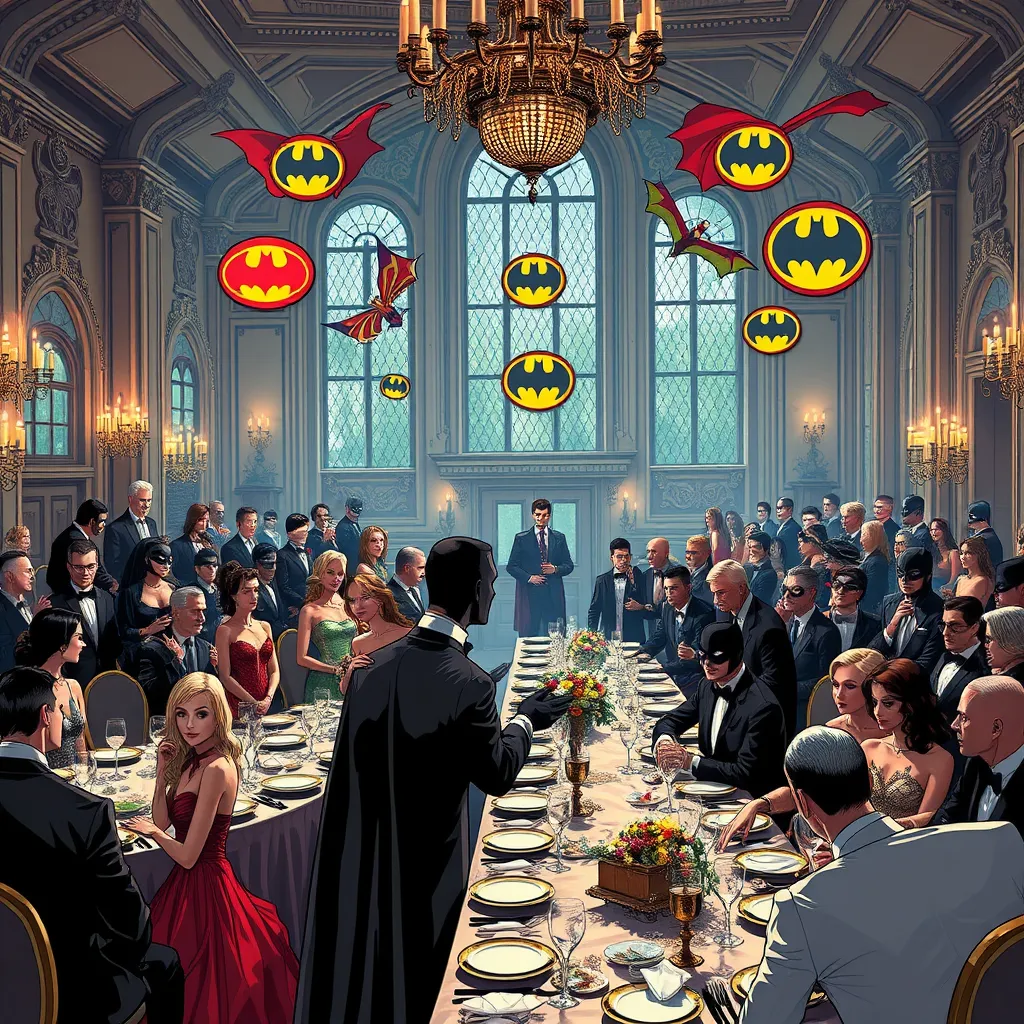

In [17]:
image_path = "/Users/lancehester/Documents/ai_agent_hugging_face_course/imgs/image.webp"

img = PILImage.open(image_path)
img

# Importing a LangChain Tool
These tools need a [SerpApi](https://serpapi.com/) API Key.

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his `smolagent`, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [21]:
search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences.                                                                                                    │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment = search(query="luxury entertainment ideas for superhero-themed event")                     
  print(luxury_entertainment)                                                                                      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['SUPER HERO THEMED EVENTS ; a batman themed birthday party with balloons and desserts. Cool Batman Party Backdrop 
- upper sturt general store · Batman Candy Table.', "Here's a look at different ideas for adding cartoon-like 
visuals and references to caped crusaders at your next affair.", 'Super Fun Superhero Event Theme ; three lamps 
with comic covers on them. Lamp In A Box Vintage Comic Shades · Superhero Living Room Decor ; a man and woman ...',
'Offer coloring pages featuring various superheroes and villains, suitable for all guests. Additionally, a station 
for customizing masks with ...', 'Ninja turtle cookies, avenger cake, and assorted superhero masks for dress up. 
The invites had a mix of different superheroes from Marvel and DC ...', 'Top 5 Superhero Themed Party Ideas · 
Silent Disco Superhero Party · Classic Superhero Costume Party · Superhero Training Camp · Superhero Movie Marathon
· Superhero ...', 'LED Battery Operated Lights · Basket Filler · Superhero Mini Buttons (pins) · Fringed Door 
Curtains · Large Superhero Signs · Small Superhero Signs ...', 'Send your guests home with superhero-themed party 
favors. Consider items like action figures, comic books, personalized masks and capes, or high-quality Marvel ...',
"Whether it's capes, masks, or full-fledged costumes, let creativity reign supreme. Provide costume accessories or 
props to enhance the superhero experience and ...", "Create an epic superhero birthday party with these top ideas, 
plus incredible invitations that'll help you share the excitement."]

Out: None

[Step 1: Duration 9.56 seconds| Input tokens: 2,002 | Output tokens: 67]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Filter out potentially relevant luxury entertainment ideas                                                     
  relevant_entertainment = [result for result in luxury_entertainment.split('\n') if 'Superhero Training Camp' in  
  result or 'Silent Disco' in result]                                                                              
                                                                                                                   
  # Print the potentially relevant luxury entertainment ideas                                                      
  print(relevant_entertainment)                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['[\'SUPER HERO THEMED EVENTS ; a batman themed birthday party with balloons and desserts. Cool Batman Party 
Backdrop - upper sturt general store · Batman Candy Table.\', "Here\'s a look at different ideas for adding 
cartoon-like visuals and references to caped crusaders at your next affair.", \'Super Fun Superhero Event Theme ; 
three lamps with comic covers on them. Lamp In A Box Vintage Comic Shades · Superhero Living Room Decor ; a man and
woman ...\', \'Offer coloring pages featuring various superheroes and villains, suitable for all guests. 
Additionally, a station for customizing masks with ...\', \'Ninja turtle cookies, avenger cake, and assorted 
superhero masks for dress up. The invites had a mix of different superheroes from Marvel and DC ...\', \'Top 5 
Superhero Themed Party Ideas · Silent Disco Superhero Party · Classic Superhero Costume Party · Superhero Training 
Camp · Superhero Movie Marathon · Superhero ...\', \'LED Battery Operated Lights · Basket Filler · Superhero Mini 
Buttons (pins) · Fringed Door Curtains · Large Superhero Signs · Small Superhero Signs ...\', \'Send your guests 
home with superhero-themed party favors. Consider items like action figures, comic books, personalized masks and 
capes, or high-quality Marvel ...\', "Whether it\'s capes, masks, or full-fledged costumes, let creativity reign 
supreme. Provide costume accessories or props to enhance the superhero experience and ...", "Create an epic 
superhero birthday party with these top ideas, plus incredible invitations that\'ll help you share the 
excitement."]']

Out: None

[Step 2: Duration 1.56 seconds| Input tokens: 4,468 | Output tokens: 184]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Split the luxury entertainment text into lines                                                                 
  lines = luxury_entertainment.split('\n')                                                                         
                                                                                                                   
  # Initialize an empty list to store potentially relevant entertainment ideas                                     
  relevant_entertainment = []                                                                                      
                                                                                                                   
  # Iterate through the lines and add relevant ones to the list                                                    
  for line in lines:                                                                                               
      if 'Superhero Training Camp' in line or 'Silent Disco' in line:                                              
          relevant_entertainment.append(line)                                                                      
                                                                                                                   
  # Print the filtered relevant entertainment ideas                                                                
  print(relevant_entertainment)                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['[\'SUPER HERO THEMED EVENTS ; a batman themed birthday party with balloons and desserts. Cool Batman Party 
Backdrop - upper sturt general store · Batman Candy Table.\', "Here\'s a look at different ideas for adding 
cartoon-like visuals and references to caped crusaders at your next affair.", \'Super Fun Superhero Event Theme ; 
three lamps with comic covers on them. Lamp In A Box Vintage Comic Shades · Superhero Living Room Decor ; a man and
woman ...\', \'Offer coloring pages featuring various superheroes and villains, suitable for all guests. 
Additionally, a station for customizing masks with ...\', \'Ninja turtle cookies, avenger cake, and assorted 
superhero masks for dress up. The invites had a mix of different superheroes from Marvel and DC ...\', \'Top 5 
Superhero Themed Party Ideas · Silent Disco Superhero Party · Classic Superhero Costume Party · Superhero Training 
Camp · Superhero Movie Marathon · Superhero ...\', \'LED Battery Operated Lights · Basket Filler · Superhero Mini 
Buttons (pins) · Fringed Door Curtains · Large Superhero Signs · Small Superhero Signs ...\', \'Send your guests 
home with superhero-themed party favors. Consider items like action figures, comic books, personalized masks and 
capes, or high-quality Marvel ...\', "Whether it\'s capes, masks, or full-fledged costumes, let creativity reign 
supreme. Provide costume accessories or props to enhance the superhero experience and ...", "Create an epic 
superhero birthday party with these top ideas, plus incredible invitations that\'ll help you share the 
excitement."]']

Out: None

[Step 3: Duration 2.78 seconds| Input tokens: 7,488 | Output tokens: 354]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Re-split the luxury entertainment text into lines correctly                                                    
  lines = luxury_entertainment.split('\n')                                                                         
                                                                                                                   
  # Initialize an empty list to store potentially relevant entertainment ideas                                     
  relevant_entertainment = []                                                                                      
                                                                                                                   
  # Iterate through the lines and add relevant ones to the list                                                    
  for line in lines:                                                                                               
      if 'Superhero Training Camp' in line or 'Silent Disco' in line:                                              
          relevant_entertainment.append(line)                                                                      
                                                                                                                   
  # Print the filtered relevant entertainment ideas                                                                
  print(relevant_entertainment)                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['[\'SUPER HERO THEMED EVENTS ; a batman themed birthday party with balloons and desserts. Cool Batman Party 
Backdrop - upper sturt general store · Batman Candy Table.\', "Here\'s a look at different ideas for adding 
cartoon-like visuals and references to caped crusaders at your next affair.", \'Super Fun Superhero Event Theme ; 
three lamps with comic covers on them. Lamp In A Box Vintage Comic Shades · Superhero Living Room Decor ; a man and
woman ...\', \'Offer coloring pages featuring various superheroes and villains, suitable for all guests. 
Additionally, a station for customizing masks with ...\', \'Ninja turtle cookies, avenger cake, and assorted 
superhero masks for dress up. The invites had a mix of different superheroes from Marvel and DC ...\', \'Top 5 
Superhero Themed Party Ideas · Silent Disco Superhero Party · Classic Superhero Costume Party · Superhero Training 
Camp · Superhero Movie Marathon · Superhero ...\', \'LED Battery Operated Lights · Basket Filler · Superhero Mini 
Buttons (pins) · Fringed Door Curtains · Large Superhero Signs · Small Superhero Signs ...\', \'Send your guests 
home with superhero-themed party favors. Consider items like action figures, comic books, personalized masks and 
capes, or high-quality Marvel ...\', "Whether it\'s capes, masks, or full-fledged costumes, let creativity reign 
supreme. Provide costume accessories or props to enhance the superhero experience and ...", "Create an epic 
superhero birthday party with these top ideas, plus incredible invitations that\'ll help you share the 
excitement."]']

Out: None

[Step 4: Duration 2.54 seconds| Input tokens: 11,156 | Output tokens: 516]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Re-split the luxury entertainment text into lines correctly                                                    
  lines = luxury_entertainment.split('\n')                                                                         
                                                                                                                   
  # Initialize an empty list to store potentially relevant entertainment ideas                                     
  relevant_entertainment = []                                                                                      
                                                                                                                   
  # Iterate through the lines and add relevant ones to the list                                                    
  for line in lines:                                                                                               
      if 'Superhero Training Camp' in line:                                                                        
          relevant_entertainment.append('Superhero Training Camp')                                                 
      elif 'Silent Disco' in line:                                                                                 
          relevant_entertainment.append('Silent Disco Superhero Party')                                            
                                                                                                                   
  # Print the filtered relevant entertainment ideas                                                                
  print(relevant_entertainment)                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['Superhero Training Camp']

Out: None

[Step 5: Duration 2.25 seconds| Input tokens: 15,466 | Output tokens: 671]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 6 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Re-split the luxury entertainment text into lines correctly                                                    
  lines = luxury_entertainment.split('\n')                                                                         
                                                                                                                   
  # Initialize an empty list to store potentially relevant entertainment ideas                                     
  relevant_entertainment = []                                                                                      
                                                                                                                   
  # Iterate through the lines and add relevant ones to the list                                                    
  for line in lines:                                                                                               
      if 'Superhero Training Camp' in line:                                                                        
          relevant_entertainment.append('Superhero Training Camp')                                                 
      elif 'Silent Disco' in line:                                                                                 
          relevant_entertainment.append('Silent Disco Superhero Party')                                            
                                                                                                                   
  # Print the filtered relevant entertainment ideas                                                                
  print(relevant_entertainment)                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['Superhero Training Camp']

Out: None

[Step 6: Duration 3.05 seconds| Input tokens: 20,121 | Output tokens: 855]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 7 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Search for "Silent Disco Superhero Party" specifically                                                         
  silent_disco_result = search(query="Silent Disco Superhero Party")                                               
                                                                                                                   
  # Search for "Superhero Training Camp" specifically                                                              
  training_camp_result = search(query="Superhero Training Camp")                                                   
                                                                                                                   
  # Initialize a list to store the relevant entertainment ideas                                                    
  relevant_entertainment = []                                                                                      
                                                                                                                   
  # Add relevant sentences from silent disco search to the list                                                    
  if 'Silent Disco Superhero Party' in silent_disco_result:                                                        
      relevant_entertainment.append('Silent Disco Superhero Party')                                                
                                                                                                                   
  # Add relevant sentences from training camp search to the list                                                   
  if 'Superhero Training Camp' in training_camp_result:                                                            
      relevant_entertainment.append('Superhero Training Camp')                                                     
                                                                                                                   
  # Print the combined relevant entertainment ideas                                                                
  print(relevant_entertainment)                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['Silent Disco Superhero Party', 'Superhero Training Camp']

Out: None

[Step 7: Duration 11.26 seconds| Input tokens: 25,148 | Output tokens: 1,077]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 8 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Combine the relevant entertainment ideas into a single string                                                  
  final_entertainment_ideas = ", ".join(relevant_entertainment)                                                    
                                                                                                                   
  # Print the final entertainment ideas                                                                            
  print(final_entertainment_ideas)                                                                                 
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Silent Disco Superhero Party, Superhero Training Camp

Out: None

[Step 8: Duration 1.67 seconds| Input tokens: 30,644 | Output tokens: 1,167]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 9 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer(final_entertainment_ideas)                                                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Silent Disco Superhero Party, Superhero Training Camp

[Step 9: Duration 1.21 seconds| Input tokens: 36,337 | Output tokens: 1,220]

'Silent Disco Superhero Party, Superhero Training Camp'

#### With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉